This notebook performs initial exploration and preprocessing of the Quora Question Pairs dataset for duplicate question detection. Through descriptive statistics, visualization, and targeted outlier removal, this EDA step ensures data quality and reveals key patterns in vocabulary and question formulation. The result is a clean, well-understood dataset - a solid foundation for effective text preprocessing and robust model training.

# 1. Imports

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

pd.set_option('float_format', '{:.2f}'.format)

# 2. Load dataset

In [41]:
df = pd.read_csv("../data/raw/quora_question_pairs_train.csv.zip")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,332278,459256,459257,The Iliad and the Odyssey in the Greek culture?,How do I prove that the pairs of three independent variables is also independent?,0
1,196656,297402,297403,What is practical management and what is strategic management?,What are the practical aspects of strategic management?,0
2,113125,184949,184950,How useful is MakeUseOf Answers?,"Is there any Q&A site that is not Yahoo answers, where hate speech is allowed?",0
3,266232,101283,163744,Which is the best place to reside in India and Why?,Which ia the best place to visit in India?,0
4,122738,17811,27517,Why do so many people ask questions on Quora that can be easily answered by any number of legitimate sources on the Web? Have they not heard of Google or Bing?,Why don't many people posting questions on Quora check Google first?,1


# 3. Dataset info and missing values

In [42]:

df.info()  # Overview: rows, columns, datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323432 entries, 0 to 323431
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            323432 non-null  int64 
 1   qid1          323432 non-null  int64 
 2   qid2          323432 non-null  int64 
 3   question1     323431 non-null  object
 4   question2     323430 non-null  object
 5   is_duplicate  323432 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.8+ MB


In [43]:
df.isna().sum()  # How many missing values per column

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

# 4. Basic statistics

In [44]:

df.describe()  # Quick statistical summary of numeric columns

,id,qid1,qid2,is_duplicate
count,323432.00,323432.00,323432.00,323432.00
mean,202283.31,217326.77,221048.08,0.37
std,116680.03,157709.13,159882.93,0.48
min,0.00,1.00,2.00,0.00
25%,101318.75,74614.75,74859.50,0.00
50%,202268.50,192394.50,197271.50,0.00
75%,303348.25,346599.25,354727.00,1.00
max,404289.00,537932.00,537933.00,1.00


# 5. Drop rows with missing values

In [45]:
df = df.dropna()

# 6. Class distribution (target variable)

is_duplicate
0   0.63
1   0.37
Name: proportion, dtype: float64


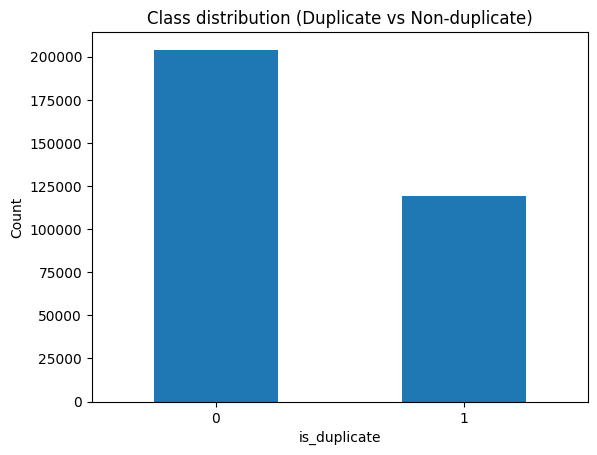

In [46]:
print(df["is_duplicate"].value_counts(normalize=True))  # Ratio of each class

df["is_duplicate"].value_counts().plot(kind="bar")
plt.title("Class distribution (Duplicate vs Non-duplicate)")
plt.xlabel("is_duplicate")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 7. Combined text analysis

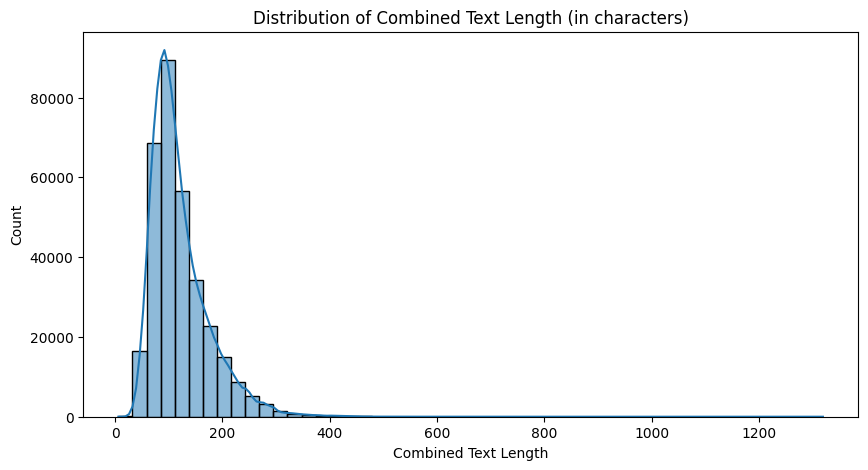

count   323429.00
mean       120.66
std         55.01
min          6.00
25%         83.00
50%        107.00
75%        145.00
max       1319.00
Name: combined_text_length, dtype: float64


In [47]:
df["combined_text"] = df["question1"].astype(str) + " " + df["question2"].astype(str)
df["combined_text_length"] = df["combined_text"].apply(len)

# Distribution of combined text length
plt.figure(figsize=(10, 5))
sns.histplot(df["combined_text_length"], bins=50, kde=True)
plt.title("Distribution of Combined Text Length (in characters)")
plt.xlabel("Combined Text Length")
plt.ylabel("Count")
plt.show()

# Print descriptive statistics for combined text lengths
print(df["combined_text_length"].describe())

It can be seen that there are outliers in the distribution of combined text length. For example, pairs shorter than 10 characters or longer than 400 characters can be considered outliers according to the histogram. Removing such anomalous rows will help reduce noise and improve model stability.

In [ ]:
LOWER_LEN = 10   # Minimum length to keep
UPPER_LEN = 400  # Maximum length to keep

# Add combined_text and its length, if not already present
df["combined_text"] = df["question1"].astype(str) + " " + df["question2"].astype(str)
df["combined_text_length"] = df["combined_text"].apply(len)

# Build a mask for valid rows
mask = (df["combined_text_length"] >= LOWER_LEN) & (df["combined_text_length"] <= UPPER_LEN)

# Print how many rows will be removed as outliers
num_removed = len(df) - mask.sum()
percent_removed = 100 * num_removed / len(df)
print(f"Removing {num_removed} outlier rows ({percent_removed:.2f}% of total)")

# Keep only non-outlier rows
df = df[mask].copy()

# Reset index
df.reset_index(drop=True, inplace=True)

# Check new distribution
print(df["combined_text_length"].describe())

df = df.drop(columns=["combined_text_length"])

Removing 530 outlier rows (0.16% of total)
count   322899.00
mean       120.08
std         52.88
min         14.00
25%         83.00
50%        107.00
75%        145.00
max        400.00
Name: combined_text_length, dtype: float64


# 8. Unique word statistics

In [49]:
unique_words_q1 = set(" ".join(df["question1"].astype(str)).lower().split())
unique_words_q2 = set(" ".join(df["question2"].astype(str)).lower().split())
unique_words_total = unique_words_q1.union(unique_words_q2)

print(f"Unique words in question1: {len(unique_words_q1)}")
print(f"Unique words in question2: {len(unique_words_q2)}")
print(f"Unique words in both: {len(unique_words_total)}")

Unique words in question1: 125956
Unique words in question2: 120639
Unique words in both: 177405


# 9. Most frequent words in all questions

Top 10 most frequent words:
the: 299668
what: 248417
is: 214106
how: 175027
i: 168405
a: 166941
to: 162011
in: 154716
of: 126411
do: 123518


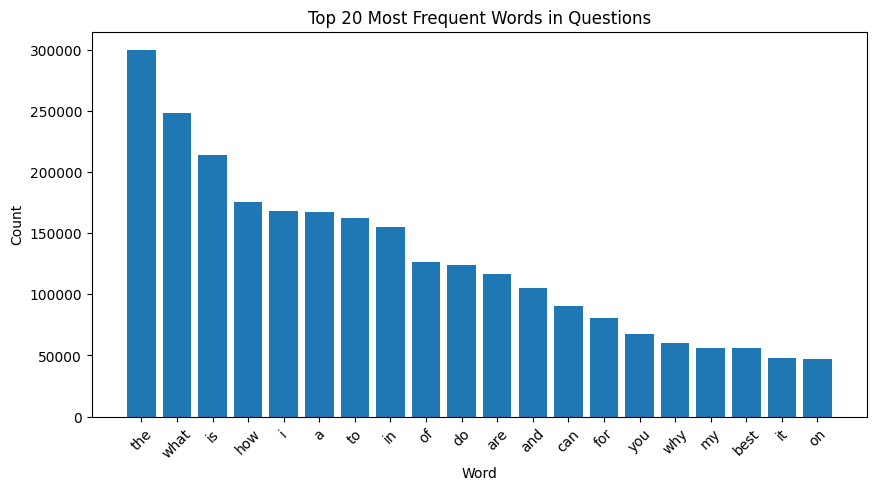

In [50]:
all_words = " ".join(df["question1"].astype(str) + " " + df["question2"].astype(str)).lower().split()
word_counts = Counter(all_words)

print("Top 10 most frequent words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")
    
# Plot top 20 most frequent words
most_common = word_counts.most_common(20)
words, counts = zip(*most_common)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title("Top 20 Most Frequent Words in Questions")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 10. Token overlap ratio between question1 and question2

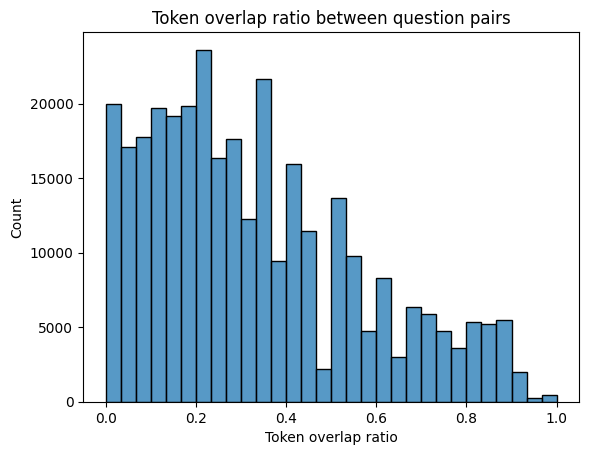

In [51]:
ratios = []
for q1, q2 in zip(df["question1"], df["question2"]):
    set1 = set(str(q1).lower().split())
    set2 = set(str(q2).lower().split())
    # Only calculate ratio if at least one question is non-empty
    if set1 or set2:
        ratio = len(set1 & set2) / len(set1 | set2)
        ratios.append(ratio)

sns.histplot(ratios, bins=30)
plt.title("Token overlap ratio between question pairs")
plt.xlabel("Token overlap ratio")
plt.ylabel("Count")
plt.show()

Token Overlap Ratio measures the proportion of shared unique words between two questions in a pair.
The closer the value is to 1, the more similar (lexically) the questions are.
The histogram shows that most question pairs have a low overlap ratio, meaning their word sets are quite different.
This is a good sign: it means dataset includes many pairs that are formulated differently, the model will need to learn meaning, not just rely on shared words.

In [52]:
# Save cleaned data for further processing
df.to_csv("../data/processed/quora_train_cleaned.csv", index=False)
